# Avocado Project



Project Description


This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_av=pd.read_csv("avocado.csv")

In [3]:
df_av

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df_av.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df_av.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
df_av.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2796,40,2015-03-22,0.85,752576.08,489678.55,157679.62,14084.25,91133.66,89232.98,1900.68,0.00,conventional,2015,WestTexNewMexico
7134,34,2017-05-07,1.65,1746824.60,56814.61,920313.85,3634.42,766061.72,451173.29,305309.26,9579.17,conventional,2017,NewYork
4348,32,2016-05-15,1.13,4999100.74,100735.10,3556589.53,172917.61,1168858.50,1062590.88,103624.27,2643.35,conventional,2016,Northeast
3225,1,2016-12-18,1.18,631117.18,92760.23,363657.94,101491.49,73207.52,65277.81,1065.60,6864.11,conventional,2016,Chicago
3630,42,2016-03-06,0.98,3818114.32,372605.84,2069786.74,534051.03,841670.71,522649.10,250138.15,68883.46,conventional,2016,GreatLakes


In [131]:
df_av.shape

(1517, 14)

In [7]:
df_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
df_av.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [9]:
df_av.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [135]:
#Droping unnamed column

In [10]:
df_av.drop("Unnamed: 0",axis=1,inplace=True)

In [11]:
df_av

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [138]:
# Three column names are in numbers ,changing that for better understanding

In [12]:
df_av.rename(columns={'4046':'SM','4225':'LA','4770':'XLA'},inplace=True)

In [13]:
df_av

,Date,AveragePrice,Total Volume,SM,LA,XLA,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [14]:
df_av.type.unique()

array(['conventional', 'organic'], dtype=object)

In [15]:
df_av=pd.get_dummies(df_av,columns=['type',],drop_first=True)

In [143]:
df_av

,Date,AveragePrice,Total Volume,SM,LA,XLA,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,Charlotte


In [16]:
LE=LabelEncoder()
df_av['region']=LE.fit_transform(df_av['region'])

In [145]:
df_av

,Date,AveragePrice,Total Volume,SM,LA,XLA,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7


In [17]:
df_av.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [18]:
df_av.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
SM              0
LA              0
XLA             0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
region          0
type_organic    0
dtype: int64

<Axes: >

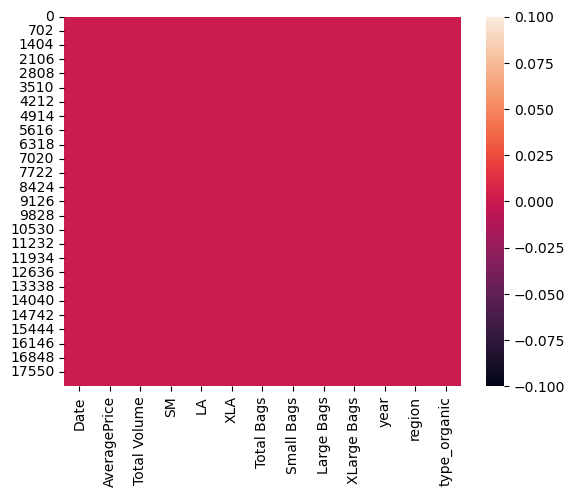

In [19]:
sns.heatmap(df_av.isnull())

In [20]:
df_avcor=df_av.corr()

ValueError: could not convert string to float: '2015-12-27'

In [ ]:
df_avcor

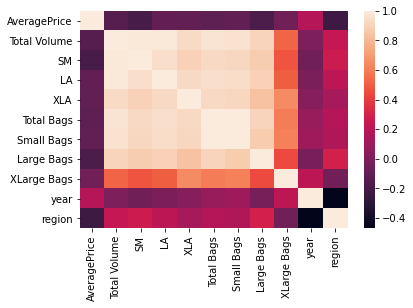

In [151]:
sns.heatmap(df_av.corr())

# Data distributed with avaerage price

<Axes: xlabel='The Average Price', ylabel='Density'>

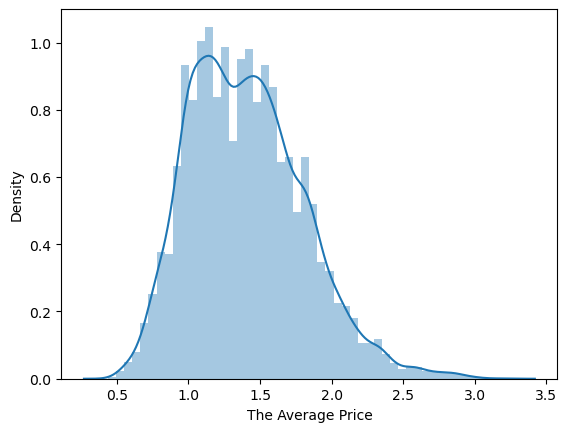

In [21]:
sns.distplot(df_av['AveragePrice'],axlabel="The Average Price")

<Axes: xlabel='year', ylabel='AveragePrice'>

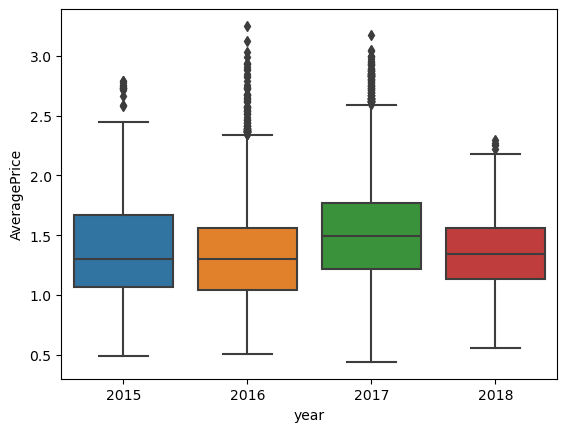

In [22]:
sns.boxplot(x="year",y="AveragePrice",data=df_av)

In [23]:
df_new=df_av[["AveragePrice","Total Volume","region","Total Bags","year"]]

In [24]:
x=df_new[["AveragePrice","Total Volume","Total Bags","year"]]

In [25]:
y=df_new.region

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [27]:
x_train.shape

(14599, 4)

In [28]:
x_test.shape

(3650, 4)

In [29]:
y_train.shape

(14599,)

In [30]:
y_test.shape

(3650,)

In [31]:
Lg = LogisticRegression()
Lg.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred_prob=Lg.predict_proba(x_test)

In [164]:
y_pred_prob

array([[1.75101103e-02, 2.79736127e-02, 3.68138039e-02, ...,
        3.84599574e-02, 3.85596081e-02, 2.06996173e-02],
       [1.96794248e-02, 2.14823163e-02, 2.33285672e-02, ...,
        2.27671202e-02, 2.29163725e-02, 1.97991459e-02],
       [1.12012363e-07, 2.21227438e-04, 4.59408731e-02, ...,
        3.83496047e-02, 4.64313069e-02, 8.32075252e-07],
       ...,
       [1.38127979e-02, 3.22989618e-02, 4.28222072e-02, ...,
        5.78234400e-02, 5.58690502e-02, 2.22510046e-02],
       [1.72007862e-02, 2.90964519e-02, 3.65655386e-02, ...,
        4.16594339e-02, 4.11871795e-02, 2.21224910e-02],
       [1.97558285e-02, 2.10350815e-02, 2.20991364e-02, ...,
        2.19256532e-02, 2.19942555e-02, 1.99937216e-02]])

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dtc=DecisionTreeClassifier()

In [37]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
dtc.score(x_train,y_train)

1.0

In [39]:
preddtc=dtc.predict(x_test)

In [172]:
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6644736842105263
[[6 0 0 ... 0 0 0]
 [0 6 0 ... 0 0 2]
 [0 0 9 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 6]]
              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.40      0.40      0.40        15
           2       0.90      0.75      0.82        12
           3       1.00      1.00      1.00        12
           4       0.60      1.00      0.75         6
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        17
           7       0.80      0.89      0.84         9
           8       0.75      0.86      0.80         7
           9       0.60      0.67      0.63         9
          10       1.00      0.40      0.57         5
          11       0.75      1.00      0.86         3
          12       0.36      0.40      0.38        10
          13       0.67      0.50      0.57         4
          14       0.67      0.50      0.57       

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn=KNeighborsClassifier()

In [42]:
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=dtc.predict(x_test)

In [181]:
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6644736842105263
[[6 0 0 ... 0 0 0]
 [0 6 0 ... 0 0 2]
 [0 0 9 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 6]]
              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.40      0.40      0.40        15
           2       0.90      0.75      0.82        12
           3       1.00      1.00      1.00        12
           4       0.60      1.00      0.75         6
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        17
           7       0.80      0.89      0.84         9
           8       0.75      0.86      0.80         7
           9       0.60      0.67      0.63         9
          10       1.00      0.40      0.57         5
          11       0.75      1.00      0.86         3
          12       0.36      0.40      0.38        10
          13       0.67      0.50      0.57         4
          14       0.67      0.50      0.57       

In [43]:
from sklearn.svm import SVC

In [44]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)

In [187]:
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.10526315789473684
[[ 9  0  0 ...  0  0  0]
 [15  0  0 ...  0  0  0]
 [12  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 7  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.03      1.00      0.07         9
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         8
           6       0.49      1.00      0.65        17
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00         4
          14 

In [45]:
#Calling the Fucntion

In [46]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)

In [47]:
predsvc=svc.predict(x_test)

In [191]:
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.10526315789473684
[[ 9  0  0 ...  0  0  0]
 [15  0  0 ...  0  0  0]
 [12  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 7  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.03      1.00      0.07         9
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         8
           6       0.49      1.00      0.65        17
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00         4
          14 

In [48]:
svmkernel('rbf')

In [49]:
svmkernel('poly')